<a href="https://colab.research.google.com/github/sangjin94/SQL_ITWILL/blob/main/da16_datetime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* python `datetime` 모듈
  * `datetime` 클래스: 날짜(date), 시간(time)과 관련된 정보들을 저장, 표현할 수 있는 기능(메서드)들을 가지고 있는 데이터 타입.
  * 파이썬 docs에서 datetime 

In [272]:
import datetime # datetime 모듈을 import

In [273]:
datetime.datetime.now() #> Colab 가상 머신의 현재 시간을 리턴함. +9시간하면 한국시간 
# datetime 모듈에 있는 datetime 클래스에 있는 now() 매서드 호출 

datetime.datetime(2021, 8, 19, 6, 47, 2, 881762)

In [274]:
from datetime import datetime # datetime 모듈에서 datetime 클래스를 import

In [275]:
datetime.now()
#datetime 클래스의 now() 매서드 호출

datetime.datetime(2021, 8, 19, 6, 47, 2, 938192)

* datetime 클래스의 메서드

In [276]:
# datetime.now(): 코드가 실행되는 컴퓨터 OS에서 설정된  시간대의 현재 시간을 리턴
curr_dt= datetime.now()

In [277]:
curr_dt # expression을 출력

datetime.datetime(2021, 8, 19, 6, 47, 2, 950875)

In [278]:
print(curr_dt) # statement

2021-08-19 06:47:02.950875


* UTC(Coordinates Universal Timezone): 그리니치 천문대 기준 시간 
* KST(Korean Standard Timezone): 한국 표준시 . UTC + 09:00

In [279]:
# datetime.datetime 클래스의 속성들(year,month,hour,minute,second)
print(type(curr_dt))
print(curr_dt.year)
print(curr_dt.month)
print(curr_dt.hour)
print(curr_dt.minute)
print(curr_dt.second)
print(f'{curr_dt.hour}:{curr_dt.minute}:{curr_dt.second}')

<class 'datetime.datetime'>
2021
8
6
47
2
6:47:2


In [280]:
# datetime.datetime() 생성자 함수
yesterday= datetime(2021,8,17)
print(yesterday)

2021-08-17 00:00:00


In [281]:
tomorrow=datetime(2021,8,19,17,20)
print(tomorrow)

2021-08-19 17:20:00


In [282]:
tomorrow-yesterday # datetime 타입의 변수들으 뺄셈 결과는 timedelta 클래스 타입

datetime.timedelta(days=2, seconds=62400)

* `datetime`(날짜/시간) 객체 <---> `str`(문자열) 객체
  * `datetime.strftime(포맷문자열)`: `datetime` 객체를 포맷 문자열로 형식으로 formatting이 된 문자열로 변환해서 리턴.
  * `datetime.strptime(문자열,포맷문자열)`: 문자열(str)을 `datetime`객체로 변환(parsing). 

* 날짜 포맷 문자열
  * `%p` AM/PM(오전/오후) 표시
  * 연도(year): `%Y`(4자리연도),`%y`(2자리연도)
  * 월(month): `%m`(2자리 숫자),`%B`(월 이름),`%b`(월 이름의 약자)
  * 일(day): `%d`(2자리 숫자)
  * 시(hour): `%H`(24시간 형식. 0~23 ),`%i`(12시간 형식. 1~12)
  * 분(minute):`%M`(2자리 숫자. 00~59)
  * 초(second):`%S`(2자리 숫자. 00~59)

In [283]:
curr_dt=datetime.now()
print(curr_dt)

2021-08-19 06:47:03.059689


In [284]:
curr_dt.strftime('%Y/%m/%d') # argument로 전달된 포맷으로 formatting된 문자열을 리턴

'2021/08/19'

In [285]:
curr_dt.strftime('%b-%d-%y')

'Aug-19-21'

In [286]:
curr_dt.strftime('%I-%M-%S-%p') # %p AM/PM(오전/오후) 표시

'06-47-03-AM'

str ---> datetime 

In [287]:
# datetime.strptime(string,format): format 형식의 문자열 string을 datetime 객체로 변환 리턴
datetime.strptime('2021-08-18 18:04:30','%Y-%m-%d %H:%M:%S')

datetime.datetime(2021, 8, 18, 18, 4, 30)

In [288]:
datetime.strptime('08-18-21','%m-%d-%y') 

datetime.datetime(2021, 8, 18, 0, 0)

In [289]:
datetime.strptime('18-08-21','%y-%m-%d')# 우리나라 방식(년-월-일)

datetime.datetime(2018, 8, 21, 0, 0)

In [290]:
datetime.strptime('18-08-21','%d-%m-%y')# 영국 방식(일-월-년)

datetime.datetime(2021, 8, 18, 0, 0)

* timestamp( UNIX time, POSIX time, epoch time,..) 1970년 1월 1일 0시 0분 0초를 시작으로해서 1초마다 1씩 증가하는 숫자. 
* `datetime.fromtimestamp` 메서드: `timestamp`(숫자) ---> `datetime`객체 

In [291]:
curr_dt= datetime.now()
print(curr_dt)

2021-08-19 06:47:03.168398


In [292]:
ts=curr_dt.timestamp()
print(ts)
print(type(ts))

1629355623.168398
<class 'float'>


In [293]:
dt= datetime.fromtimestamp(1629334480)
print(dt)
print(type(dt))

2021-08-19 00:54:40
<class 'datetime.datetime'>


In [294]:
ratings_file='https://github.com/wesm/pydata-book/raw/2nd-edition/datasets/movielens/ratings.dat'

In [295]:
import pandas as pd

In [296]:
ratings=pd.read_csv(ratings_file,sep='::',engine='python',
                    names=['user_id','moive_id','rating','ts'],
                    nrows=10) # 파일에서 10개 행만 읽음

In [297]:
ratings

,user_id,moive_id,rating,ts
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268
6,1,1287,5,978302039
7,1,2804,5,978300719
8,1,594,4,978302268
9,1,919,4,978301368


In [298]:
dates=[] # rating 데이터프레임의 ts값(timestamp)을 datetime 객체로 변환한 값들을 저장하기 위한 리스트
for ts in ratings['ts']: # ts 컬럼의 값들을 처음부터 끝까지 반복하면서
  dates.append(datetime.fromtimestamp(ts)) #숫자를 datetime으로 변환 후 리스트에 추가

# dates에 저장된 값들을 파생변수로 데이터프레임에 추가
ratings['dt']=pd.Series(dates) 

In [299]:
ratings

,user_id,moive_id,rating,ts,dt
0,1,1193,5,978300760,2000-12-31 22:12:40
1,1,661,3,978302109,2000-12-31 22:35:09
2,1,914,3,978301968,2000-12-31 22:32:48
3,1,3408,4,978300275,2000-12-31 22:04:35
4,1,2355,5,978824291,2001-01-06 23:38:11
5,1,1197,3,978302268,2000-12-31 22:37:48
6,1,1287,5,978302039,2000-12-31 22:33:59
7,1,2804,5,978300719,2000-12-31 22:11:59
8,1,594,4,978302268,2000-12-31 22:37:48
9,1,919,4,978301368,2000-12-31 22:22:48


In [300]:
# pd.to_datetime() 함수: 문자열 Series 또는 숫자 Series를 datetime Series로 변환
ratings['dt2']=pd.to_datetime(ratings['ts'],unit='s')
#> unit: timestamp(숫자)가 저장하고 있는 시간의 단위
#(s;초, ms : milli_second,us:micro_second,ns: nano_second)
ratings

,user_id,moive_id,rating,ts,dt,dt2
0,1,1193,5,978300760,2000-12-31 22:12:40,2000-12-31 22:12:40
1,1,661,3,978302109,2000-12-31 22:35:09,2000-12-31 22:35:09
2,1,914,3,978301968,2000-12-31 22:32:48,2000-12-31 22:32:48
3,1,3408,4,978300275,2000-12-31 22:04:35,2000-12-31 22:04:35
4,1,2355,5,978824291,2001-01-06 23:38:11,2001-01-06 23:38:11
5,1,1197,3,978302268,2000-12-31 22:37:48,2000-12-31 22:37:48
6,1,1287,5,978302039,2000-12-31 22:33:59,2000-12-31 22:33:59
7,1,2804,5,978300719,2000-12-31 22:11:59,2000-12-31 22:11:59
8,1,594,4,978302268,2000-12-31 22:37:48,2000-12-31 22:37:48
9,1,919,4,978301368,2000-12-31 22:22:48,2000-12-31 22:22:48


CSV파일 날짜/시간 처리

In [301]:
file_path='https://github.com/wesm/pydata-book/raw/2nd-edition/examples/spx.csv'

In [302]:
df=pd.read_csv(file_path)

In [303]:
df.head()

,Date,SPX
0,1990-02-01 00:00:00,328.79
1,1990-02-02 00:00:00,330.92
2,1990-02-05 00:00:00,331.85
3,1990-02-06 00:00:00,329.66
4,1990-02-07 00:00:00,333.75


데이터프레임의 Date 컬럼의 데이터 타입?

In [304]:
df.info() #Date 컬럼의 데이터 타입은 object -> 문자열(str)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5472 entries, 0 to 5471
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5472 non-null   object 
 1   SPX     5472 non-null   float64
dtypes: float64(1), object(1)
memory usage: 85.6+ KB


In [305]:
# 연도별 주식 가격의 평균, 최소 ,최대
df['year']=df['Date'].str[:4].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5472 entries, 0 to 5471
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5472 non-null   object 
 1   SPX     5472 non-null   float64
 2   year    5472 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 128.4+ KB


In [306]:
df['dt']=pd.to_datetime(df['Date'])

In [307]:
df.groupby('year')['SPX'].agg(['mean','min','max'])

,mean,min,max
year,,,
1990,334.123506,295.46,368.95
1991,376.186324,311.49,417.09
1992,415.747008,394.50,441.28
1993,451.614822,429.05,470.94
1994,460.416508,438.92,482.00
1995,541.719087,459.11,621.69
1996,670.494843,598.48,757.03
1997,873.427787,737.01,983.79
1998,1085.503254,927.69,1241.81


Date 컬럼의 타입이 문자열인 경우, 주기별(연도별, 분기별, 월별, ...) 통계를 계산하기 위해서는 문자열을 parsing 해서 파생변수를 추가하고  groupby 계산을 해야함.
Date 컬럼의 타입이 datetime인 경우, 그런 계산들을 간단히 수행할 수 있음.

In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5472 entries, 0 to 5471
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5472 non-null   object        
 1   SPX     5472 non-null   float64       
 2   year    5472 non-null   int64         
 3   dt      5472 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 171.1+ KB


In [309]:
# 새로 추가된 dt 컬럼을 index로 변환
df=df.set_index('dt')

In [310]:
# df에서 datetime 타입의 인덱스를 사용해서 연도별 SPX 컬럼의 평균,최솟값,최댓값을 계산 
df.resample('Y')['SPX'].agg(['mean','min','max'])

,mean,min,max
dt,,,
1990-12-31,334.123506,295.46,368.95
1991-12-31,376.186324,311.49,417.09
1992-12-31,415.747008,394.50,441.28
1993-12-31,451.614822,429.05,470.94
1994-12-31,460.416508,438.92,482.00
1995-12-31,541.719087,459.11,621.69
1996-12-31,670.494843,598.48,757.03
1997-12-31,873.427787,737.01,983.79
1998-12-31,1085.503254,927.69,1241.81


In [311]:
# 분기(Quarter)별 통계
df.resample('Q')['SPX'].agg(['mean','min','max'])

,mean,min,max
dt,,,
1990-03-31,334.751951,324.15,343.53
1990-06-30,349.796508,329.11,367.40
1990-09-30,335.881746,300.97,368.95
1990-12-31,316.562031,295.46,331.75
1991-03-31,352.282951,311.49,376.72
...,...,...,...
2010-12-31,1204.585625,1137.03,1259.78
2011-03-31,1302.529032,1256.88,1343.01
2011-06-30,1318.332857,1265.42,1363.61


In [312]:
# 월(Month)별 통계
df.resample('M')['SPX'].agg(['mean','min','max'])

,mean,min,max
dt,,,
1990-02-28,330.452632,324.15,334.89
1990-03-31,338.465000,332.74,343.53
1990-04-30,338.178000,329.11,344.74
1990-05-31,350.250000,332.25,361.23
1990-06-30,360.386667,352.06,367.40
...,...,...,...
2011-06-30,1287.288636,1265.42,1320.64
2011-07-31,1325.184500,1292.28,1353.22
2011-08-31,1185.305652,1119.46,1286.94


In [313]:
# CSV 파일을 읽을 때, 날짜/시간 포맷의 문자열을 datetime 객체로 자동 변환
df2=pd.read_csv(file_path,parse_dates=['Date'])

In [314]:
df2.head()

,Date,SPX
0,1990-02-01,328.79
1,1990-02-02,330.92
2,1990-02-05,331.85
3,1990-02-06,329.66
4,1990-02-07,333.75


In [315]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5472 entries, 0 to 5471
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5472 non-null   datetime64[ns]
 1   SPX     5472 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 85.6 KB


In [316]:
# datetime 객체를 저장하는 컬럼을 (row) index로 설정 -> resample 매서드를 사용하기 위해서
df2=df2.set_index('Date')
df2.head()

,SPX
Date,
1990-02-01,328.79
1990-02-02,330.92
1990-02-05,331.85
1990-02-06,329.66
1990-02-07,333.75


In [317]:
df3= pd.read_csv(file_path,parse_dates=['Date'],index_col=['Date'])
#> parse_dates: datetime객체로 변환할 컬럼들의 리스트
# parse_dates 파라미터를 사용하는 대신에, pd.to_datetime() 함수를 이용할 수도 있음.
#> index_col: (row) index로 만들 컬럼들의 리스트. 
# index_col 파라미터를 사용하는 대신에, pd.DataFrame.set_index() 메서드를 이용할 수도 있음. 

In [318]:
df3.head()

,SPX
Date,
1990-02-01,328.79
1990-02-02,330.92
1990-02-05,331.85
1990-02-06,329.66
1990-02-07,333.75


In [319]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5472 entries, 1990-02-01 to 2011-10-14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SPX     5472 non-null   float64
dtypes: float64(1)
memory usage: 85.5 KB


* github에 저장된 banklist.csv 파일을 읽고, 데이터 프레임을 생성
* datetime 타입으로 변환할 수 있는 컬럼(들)을 타입 변환
* 연도별 파산한 은행 숫자를 찾고, 시각화 
* 분기별 파산한 은행 숫자를 찾고, 시각화
* 파산한 날짜를 인덱스로 

In [320]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [321]:
bank_file='https://github.com/JakeOh/202105_itw_bd26/raw/main/datasets/banklist.csv'

In [322]:
banklist=pd.read_csv(bank_file,parse_dates=['Closing Date','Updated Date'],index_col=['Closing Date'])

In [323]:
banklist

,Bank Name,City,ST,CERT,Acquiring Institution,Updated Date
Closing Date,,,,,,
2017-12-15,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,2017-12-20
2017-10-13,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,2017-10-20
2017-05-26,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",2017-07-26
2017-05-05,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,2017-07-26
2017-04-28,First NBC Bank,New Orleans,LA,58302,Whitney Bank,2017-12-05
...,...,...,...,...,...,...
2001-07-27,"Superior Bank, FSB",Hinsdale,IL,32646,"Superior Federal, FSB",2014-08-19
2001-05-03,Malta National Bank,Malta,OH,6629,North Valley Bank,2002-11-18
2001-02-02,First Alliance Bank & Trust Co.,Manchester,NH,34264,Southern New Hampshire Bank & Trust,2003-02-18


In [324]:
Year_bank2=banklist.resample('Y').size() # 아래함수와 같음
Year_bank2

Closing Date
2000-12-31      2
2001-12-31      4
2002-12-31     11
2003-12-31      3
2004-12-31      4
2005-12-31      0
2006-12-31      0
2007-12-31      3
2008-12-31     25
2009-12-31    140
2010-12-31    157
2011-12-31     92
2012-12-31     51
2013-12-31     24
2014-12-31     18
2015-12-31      8
2016-12-31      5
2017-12-31      8
Freq: A-DEC, dtype: int64

In [325]:
Year_bank=banklist.resample('Y')['Bank Name'].agg('count')
Year_bank

Closing Date
2000-12-31      2
2001-12-31      4
2002-12-31     11
2003-12-31      3
2004-12-31      4
2005-12-31      0
2006-12-31      0
2007-12-31      3
2008-12-31     25
2009-12-31    140
2010-12-31    157
2011-12-31     92
2012-12-31     51
2013-12-31     24
2014-12-31     18
2015-12-31      8
2016-12-31      5
2017-12-31      8
Freq: A-DEC, Name: Bank Name, dtype: int64

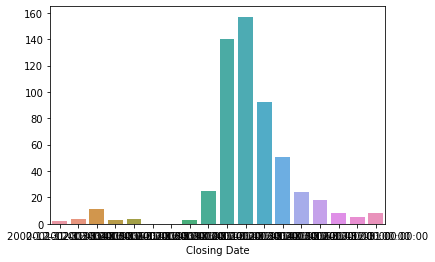

In [326]:
sns.barplot(y=Year_bank.values,x=Year_bank.index)

In [327]:
Q_bank=banklist.resample('Q')['Bank Name'].agg('count')

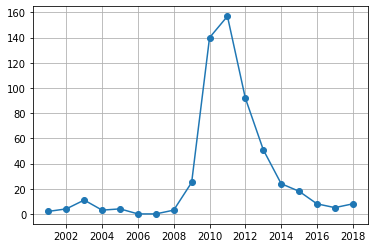

In [328]:
plt.plot(Year_bank,marker='o')
plt.grid()
plt.show()

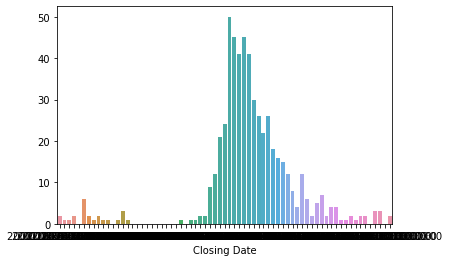

In [329]:
sns.barplot(y=Q_bank.values,x=Q_bank.index)

대기 중 NO2 농도 측정 데이터

In [330]:
no2_file='https://github.com/pandas-dev/pandas/raw/master/doc/data/air_quality_no2_long.csv'

* csv 파일을 읽고 DataFrame을 생성
* datetime타입으로 변환할 수 있는 컬럼을 변환

In [331]:
air_quality=pd.read_csv(no2_file)

In [332]:
air_quality['date.utc']=pd.to_datetime(air_quality['date.utc'])

datetime64 타입의 컬럼에서도 min,max 메서드를 사용할 수 있음. 

In [333]:
air_quality['date.utc'].min()

Timestamp('2019-05-07 01:00:00+0000', tz='UTC')

In [334]:
air_quality['date.utc'].max()

Timestamp('2019-06-21 00:00:00+0000', tz='UTC')

datetime64 타입의 컬럼에서 년/월/일/시/분/초/요일 등의 정보 추출

In [335]:
air_quality['date.utc'].dt.year

0       2019
1       2019
2       2019
3       2019
4       2019
        ... 
2063    2019
2064    2019
2065    2019
2066    2019
2067    2019
Name: date.utc, Length: 2068, dtype: int64

In [336]:
air_quality['date.utc'].dt.month

0       6
1       6
2       6
3       6
4       6
       ..
2063    5
2064    5
2065    5
2066    5
2067    5
Name: date.utc, Length: 2068, dtype: int64

In [337]:
air_quality['date.utc'].dt.weekday # datetime에서 요일 정보 추출
# 0(월요일),1(화요일),...,5(토요일),6(일요일)

0       4
1       3
2       3
3       3
4       3
       ..
2063    1
2064    1
2065    1
2066    1
2067    1
Name: date.utc, Length: 2068, dtype: int64

하루 중 언제 NO2의 농도가 가장 높을까? 
  * 시간대별 도시별 NO2 평균 계산,시각화

In [338]:
air_quality['hour']=air_quality['date.utc'].dt.hour

In [339]:
air_quality

,city,country,date.utc,location,parameter,value,unit,hour
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,0
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,23
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,22
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,21
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,20
...,...,...,...,...,...,...,...,...
2063,London,GB,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0,µg/m³,6
2064,London,GB,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0,µg/m³,4
2065,London,GB,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0,µg/m³,3
2066,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,µg/m³,2


In [340]:
air_quality_hour=air_quality.groupby(['city','hour'])['value'].mean() #Groupby의 결과는 Series로 변환됨
air_quality_hour

city       hour
Antwerpen  0       24.750000
           1       25.838235
           2       21.000000
           3       21.333333
           4       24.833333
                     ...    
Paris      19      26.635714
           20      29.707143
           21      33.237209
           22      35.400000
           23      34.288095
Name: value, Length: 72, dtype: float64

In [341]:
air_quality_hour=air_quality_hour.reset_index() # 모든 인덱스를 컬럼으로 변환(Series -> DataFrame)

In [342]:
air_quality_hour

,city,hour,value
0,Antwerpen,0,24.750000
1,Antwerpen,1,25.838235
2,Antwerpen,2,21.000000
3,Antwerpen,3,21.333333
4,Antwerpen,4,24.833333
...,...,...,...
67,Paris,19,26.635714
68,Paris,20,29.707143
69,Paris,21,33.237209
70,Paris,22,35.400000


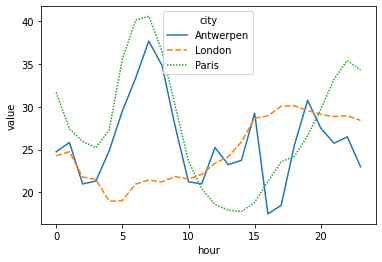

In [343]:
sns.lineplot(data=air_quality_hour, x='hour',y='value',hue='city',style='city')
plt.show()

In [344]:
result = air_quality.pivot_table(values='value', index=air_quality['date.utc'].dt.hour, columns='city')

In [345]:
result

city,Antwerpen,London,Paris
date.utc,,,
0,24.750000,24.292683,31.683333
1,25.838235,24.757576,27.433333
2,21.000000,21.800000,25.964286
3,21.333333,21.536585,25.234211
4,24.833333,18.976190,27.257895
5,29.500000,19.048780,35.534211
6,33.333333,20.976190,40.102381
7,37.666667,21.452381,40.569767
8,34.833333,21.238095,36.458140


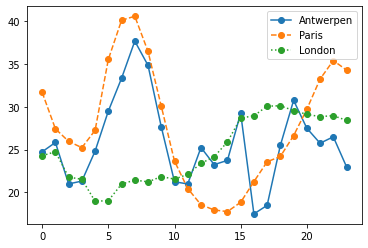

In [346]:
plt.plot(result['Antwerpen'], linestyle='-', marker='o', label='Antwerpen')
plt.plot(result['Paris'], linestyle='--', marker='o', label='Paris')
plt.plot(result['London'], linestyle=':', marker='o', label='London')
plt.legend()
plt.show()

 일요일 중 어느요일에 NO2 농도가 가장 높을까?
  * 요일별 도시별 NO2 평균 계산,시각화

In [347]:
air_quality['weekday']=air_quality['date.utc'].dt.weekday

In [348]:
air_quality

,city,country,date.utc,location,parameter,value,unit,hour,weekday
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,0,4
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,23,3
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,22,3
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,21,3
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,20,3
...,...,...,...,...,...,...,...,...,...
2063,London,GB,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0,µg/m³,6,1
2064,London,GB,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0,µg/m³,4,1
2065,London,GB,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0,µg/m³,3,1
2066,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,µg/m³,2,1


In [349]:
air_quality_weekday=air_quality.groupby(['weekday','city'])['value'].mean()
air_quality_weekday

weekday  city     
0        Antwerpen    27.875000
         London       23.969697
         Paris        24.856250
1        Antwerpen    22.214286
         London       24.885714
         Paris        30.999359
2        Antwerpen    21.125000
         London       23.460432
         Paris        29.165753
3        Antwerpen    27.500000
         London       24.780142
         Paris        28.600690
4        Antwerpen    28.400000
         London       26.446809
         Paris        31.617986
5        Antwerpen    33.500000
         London       24.977612
         Paris        25.266154
6        Antwerpen    21.896552
         London       24.859155
         Paris        23.274306
Name: value, dtype: float64

In [350]:
air_quality_weekday=air_quality_weekday.reset_index() # reset_index를 이용해서 인덱스들을 컬럼으로 변환
air_quality_weekday

,weekday,city,value
0,0,Antwerpen,27.875000
1,0,London,23.969697
2,0,Paris,24.856250
3,1,Antwerpen,22.214286
4,1,London,24.885714
5,1,Paris,30.999359
6,2,Antwerpen,21.125000
7,2,London,23.460432
8,2,Paris,29.165753
9,3,Antwerpen,27.500000


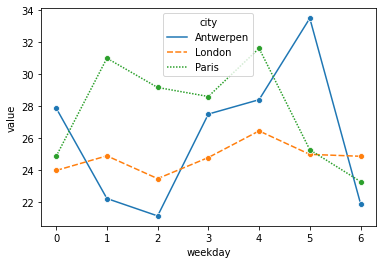

In [354]:
sns.lineplot(data=air_quality_weekday,x='weekday',y='value',hue='city',style='city',marker='o')

In [358]:
result=air_quality_weekday.pivot_table(values='value',index='weekday',columns='city')

In [359]:
result

city,Antwerpen,London,Paris
weekday,,,
0,27.875000,23.969697,24.856250
1,22.214286,24.885714,30.999359
2,21.125000,23.460432,29.165753
3,27.500000,24.780142,28.600690
4,28.400000,26.446809,31.617986
5,33.500000,24.977612,25.266154
6,21.896552,24.859155,23.274306


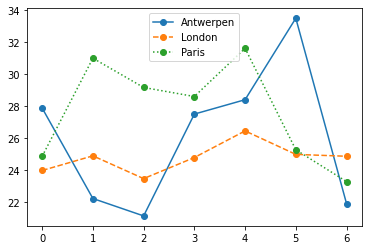

In [361]:
plt.plot(result['Antwerpen'],'o-',label='Antwerpen')
plt.plot(result['London'],'o--',label='London')
plt.plot(result['Paris'],'o:',label='Paris')
plt.legend()
plt.show()

# DatetimeIndex를 사용한 Slicing

In [364]:
air_quality.head()

,city,country,date.utc,location,parameter,value,unit,hour,weekday
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,0,4
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,23,3
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,22,3
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,21,3
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,20,3


In [365]:
# 'date.utc' 컬럼을 인덱스로 변환 
air_quality=air_quality.set_index('date.utc')

In [367]:
air_quality.head()

,city,country,location,parameter,value,unit,hour,weekday
date.utc,,,,,,,,
2019-06-21 00:00:00+00:00,Paris,FR,FR04014,no2,20.0,µg/m³,0,4
2019-06-20 23:00:00+00:00,Paris,FR,FR04014,no2,21.8,µg/m³,23,3
2019-06-20 22:00:00+00:00,Paris,FR,FR04014,no2,26.5,µg/m³,22,3
2019-06-20 21:00:00+00:00,Paris,FR,FR04014,no2,24.9,µg/m³,21,3
2019-06-20 20:00:00+00:00,Paris,FR,FR04014,no2,21.4,µg/m³,20,3


In [377]:
#2019-06-01 데이터 추출
air_quality.loc['2019-06-01']

,city,country,location,parameter,value,unit,hour,weekday
date.utc,,,,,,,,
2019-06-01 23:00:00+00:00,Paris,FR,FR04014,no2,32.7,µg/m³,23,5
2019-06-01 22:00:00+00:00,Paris,FR,FR04014,no2,48.1,µg/m³,22,5
2019-06-01 21:00:00+00:00,Paris,FR,FR04014,no2,49.4,µg/m³,21,5
2019-06-01 20:00:00+00:00,Paris,FR,FR04014,no2,43.6,µg/m³,20,5
2019-06-01 19:00:00+00:00,Paris,FR,FR04014,no2,24.6,µg/m³,19,5
2019-06-01 18:00:00+00:00,Paris,FR,FR04014,no2,14.5,µg/m³,18,5
2019-06-01 17:00:00+00:00,Paris,FR,FR04014,no2,11.8,µg/m³,17,5
2019-06-01 16:00:00+00:00,Paris,FR,FR04014,no2,11.8,µg/m³,16,5
2019-06-01 15:00:00+00:00,Paris,FR,FR04014,no2,10.2,µg/m³,15,5


In [378]:
#2019-06-15 ~2019-06-16 데이터 추출
air_quality.loc['2019-06-15':'2019-06-16']

,city,country,location,parameter,value,unit,hour,weekday
date.utc,,,,,,,,
2019-06-16 23:00:00+00:00,Paris,FR,FR04014,no2,67.3,µg/m³,23,6
2019-06-16 22:00:00+00:00,Paris,FR,FR04014,no2,56.6,µg/m³,22,6
2019-06-16 21:00:00+00:00,Paris,FR,FR04014,no2,42.7,µg/m³,21,6
2019-06-16 20:00:00+00:00,Paris,FR,FR04014,no2,23.3,µg/m³,20,6
2019-06-16 19:00:00+00:00,Paris,FR,FR04014,no2,14.4,µg/m³,19,6
...,...,...,...,...,...,...,...,...
2019-06-15 07:00:00+00:00,London,GB,London Westminster,no2,13.0,µg/m³,7,5
2019-06-15 06:00:00+00:00,London,GB,London Westminster,no2,13.0,µg/m³,6,5
2019-06-15 05:00:00+00:00,London,GB,London Westminster,no2,10.0,µg/m³,5,5


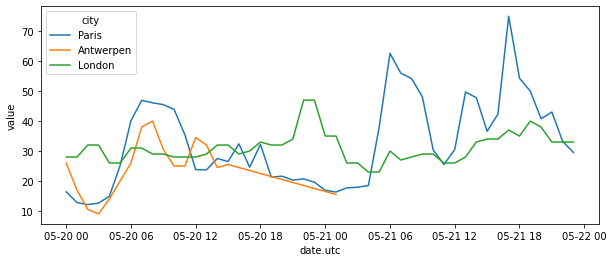

In [384]:
# 2019-05-20 0시~2019-05-21 23시 no2 농도 변화를 도시별로 linplot
plt.figure(figsize=(10,4))
sns.lineplot(x=air_quality.loc['2019-05-20 00:00:00':'2019-05-21 23:00:00'].index,hue=air_quality.loc['2019-05-20 00:00:00':'2019-05-21 23:00:00']['city'],y=air_quality.loc['2019-05-20 00:00:00':'2019-05-21 23:00:00']['value'])
plt.show()